[Bigtable: Qwik Start — powłoka Hbase](https://www.cloudskillsboost.google/focuses/580?catalog_rank=%7B%22rank%22%3A2%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=23581516)

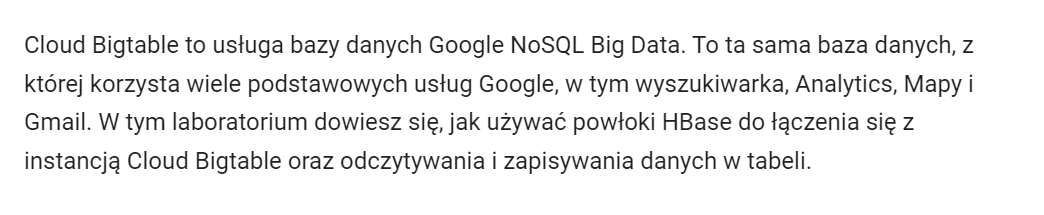

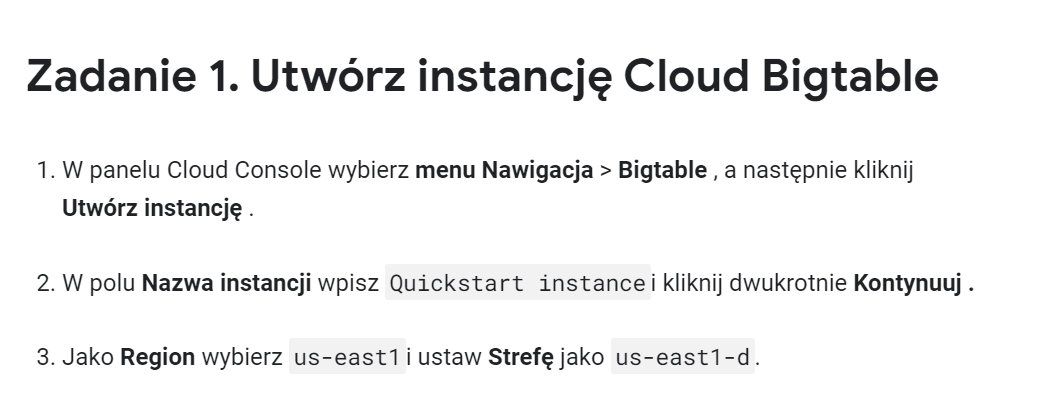

In [ ]:
# Quickstart instance

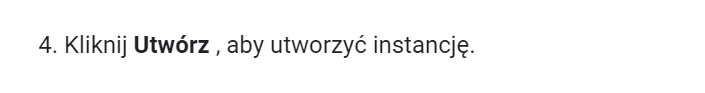

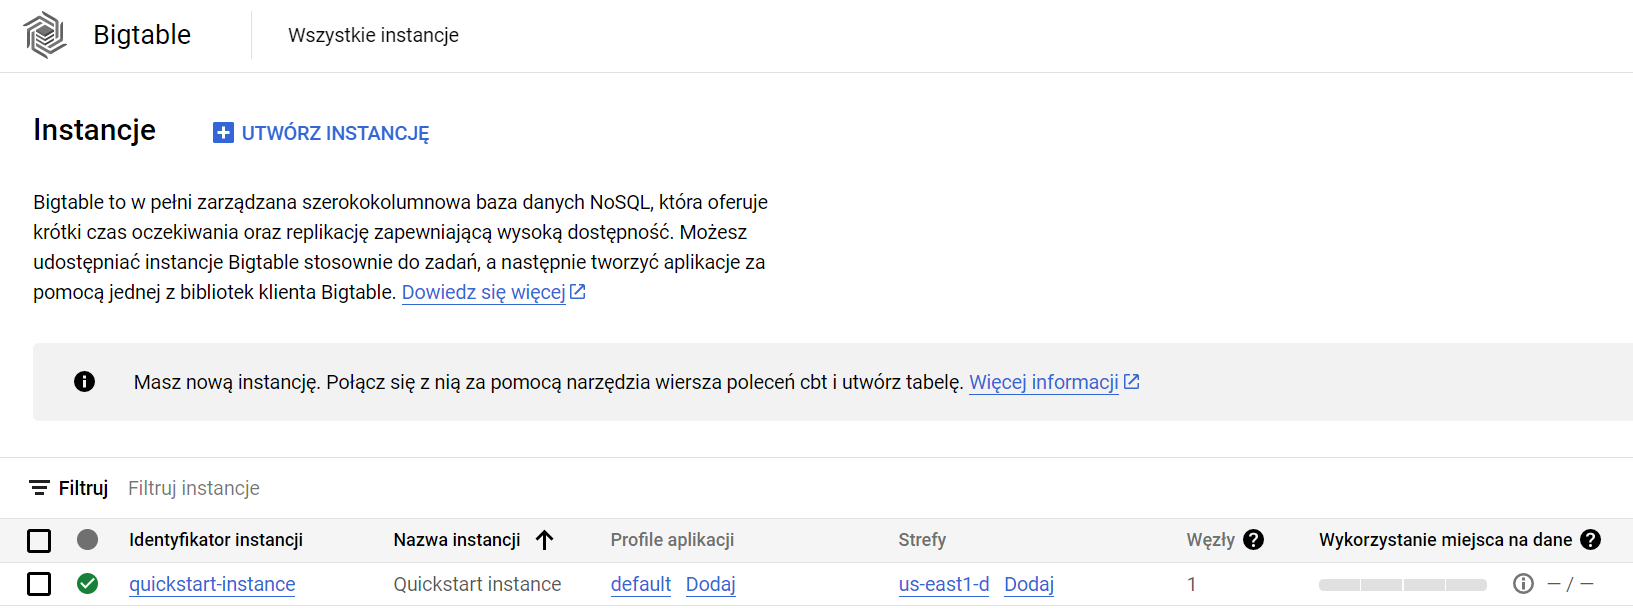

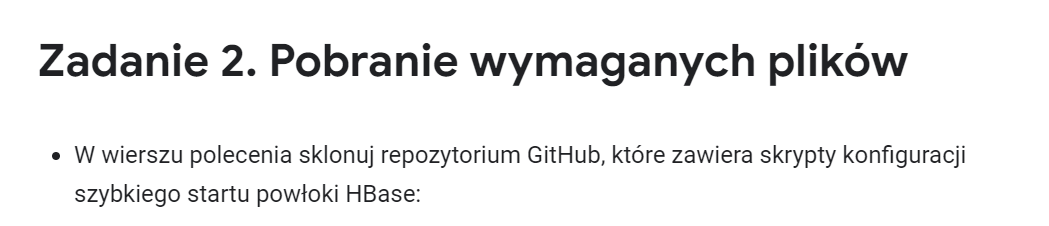

In [ ]:
# https://github.com/GoogleCloudPlatform/cloud-bigtable-examples

In [ ]:
git clone https://github.com/GoogleCloudPlatform/cloud-bigtable-examples.git

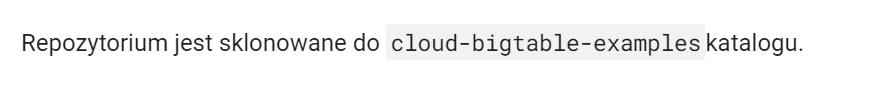

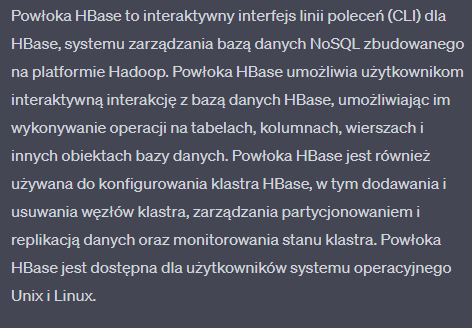

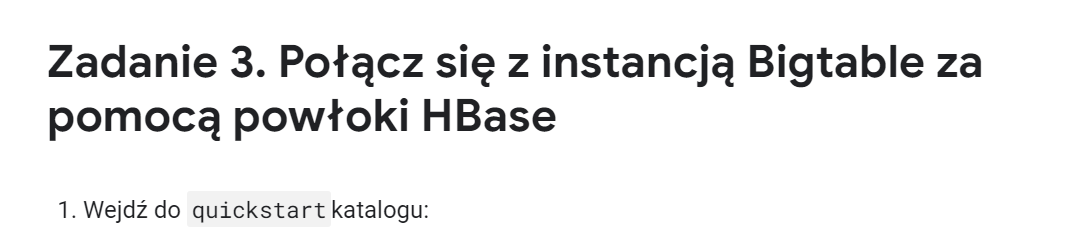

In [ ]:
cd cloud-bigtable-examples/quickstart

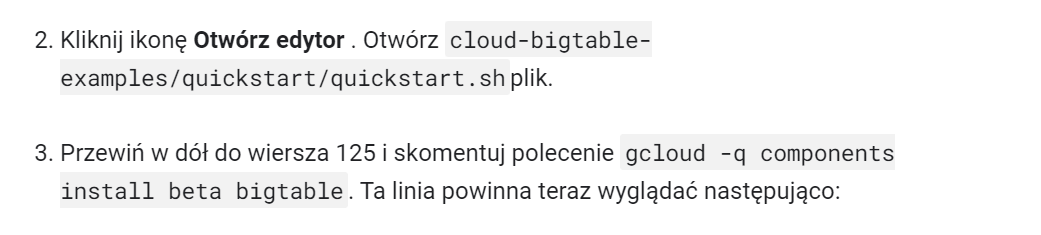

In [ ]:
# gcloud -q components install beta bigtable

In [ ]:
#!/bin/bash
#
#    Copyright 2015 Google, Inc.
#
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.set -x -e

# quickstart.sh
#
# This will start hbase shell using the pom.xml, assuming you have:
# 1. gcloud auth login
# 2. either given --project NAME or gcloud config set project XXXXX
# 3. have created a Cloud Bigtable Instance

# Prequsites: gcloud, mvn, Java

beta="beta"

# Allow executing from any directory
cd "$( cd "$( dirname "${BASH_SOURCE[0]}" )" && pwd )"

# Allow overriding the date function for unit testing.
function my_date() {
  date "$@"
}

# Simple wrapper around "echo" so that it's easy to add log messages with a
# date/time prefix.
function loginfo() {
  echo "$(my_date): ${@}"
}

# Simple wrapper around "echo" controllable with ${VERBOSE_MODE}.
function logdebug() {
  if (( ${VERBOSE_MODE} )); then
    loginfo ${@}
  fi
}

# Simple wrapper to pass errors to stderr.
function logerror() {
  loginfo ${@} >&2
}

# Handler for errors occuring during the deployment to print useful info before
# exiting. The following global variables control whether handle_error() should
# actually process and consolidate a trapped error, or otherwise simply flip
# CAUGHT_ERROR to '1' without trying to consolidate logs or exiting in case
# the caller wants to simply continue on error.
SUPPRESS_TRAPPED_ERRORS=0
CAUGHT_ERROR=0
function handle_error() {
  # Save the error code responsible for the trap.
  local errcode=$?
  local bash_command=${BASH_COMMAND}
  local lineno=${BASH_LINENO[0]}

  CAUGHT_ERROR=1

  if (( ${SUPPRESS_TRAPPED_ERRORS} )); then
    loginfo "Continuing despite trapped error with code '${errcode}'"
    return
  fi

  # Wait for remaining async things to finish, otherwise our error message may
  # get lost among other logspam.
  wait
  logerror "Command failed: ${bash_command} on line ${lineno}."
  logerror "Exit code of failed command: ${errcode}"

#  consolidate_error_logs
  exit ${errcode}
}

# Given $1 prints and reads a response from the console.
SKIP_PROMPT=0
function prompt() {
  trap handle_error ERR
  local msg="$1"

  read -p "${msg}" PROMPT_RESPONSE
}

# Test for java
hash java 2>/dev/null  || { echo >&2 'Java needs to be installed'; exit 1; }

# Test for Maven
hash mvn 2>/dev/null  || { echo >&2 'Apache Maven needs to be installed.'; exit 1; }

# Test for gcloud
hash gcloud 2>/dev/null  || { echo >&2 'gcloud needs to be installed from https://cloud.google.com/sdk/'; exit 1; }
NOTLOGGEDIN=$(gcloud auth list --format text 2>/dev/null | grep active_account | grep None)
if [[ -n "$NOTLOGGEDIN" ]]; then
  echo >&2 'Please login using: gcloud init'; exit 1;
fi

if [ "$1" == "--project" ]; then
  _projectID=$2
else
  # If possible set a default project
  _defProj=$(gcloud config list project 2>/dev/null | grep project)
  if [ $? -eq 0 ] && [ -n "${_defProj}" ]; then
    _projectID="${_defProj##project = }"

    HAVEPROJECT=$(gcloud projects list --format 'value (projectId)' 2>/dev/null | grep "${_projectID}")
    if [ $? -ne 0 ]; then
      { echo "Project ${_projectID} not found."; exit 1; }
    fi
  else
    ix=1;for item in $(gcloud projects list --format='value (projectId)' 2>/dev/null ); do PROJ[$ix]=$item; echo $ix. $item; ((ix++)); done
    prompt "Select the project? "
    _projectID=${PROJ[$PROMPT_RESPONSE]}
  fi
fi

# gcloud -q components install beta bigtable

# Test for api enabled

HAVECLCMD=$(gcloud $beta bigtable instances list --project ${_projectID} 2>&1 1>/dev/null | grep ERROR)
if [[ $HAVECLCMD == ERROR* ]]; then
  echo "Project ID= ${_projectID}"
  prompt 'Instance ID= '
  _instanceID=$PROMPT_RESPONSE
else
  ix=0
  for item in $(gcloud $beta bigtable clusters list --project ${_projectID} --format 'value (INSTANCE)'); do
    _c[$ix]=$item
    ((ix++))
  done
  if [ $ix -eq 1 ]; then
    _instanceID=${_c[0]}
  else
    echo "Please choose an Instance to work with."

    for ((i=0; i<$ix; i++)); do
      echo $i. ${_c[$i]}
    done
    prompt 'Instance ID= '
    _instanceID=${_c[$PROMPT_RESPONSE]}
  fi
fi

echo "Project ID = ${_projectID}"
echo "Instance ID= ${_instanceID}"

mvn clean package exec:java -Dbigtable.projectID="${_projectID}" -Dbigtable.instanceID="${_instanceID}"



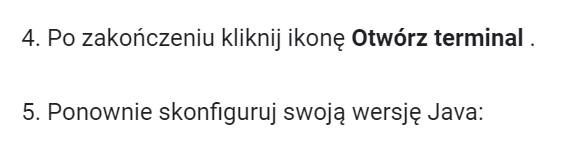

In [ ]:
export JAVA_HOME=$(update-alternatives --list java | tail -1 | sed -E 's/\/bin\/java//')

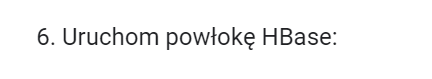

In [ ]:
./quickstart.sh

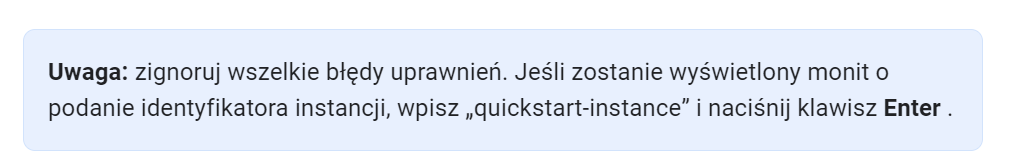

In [ ]:
# quickstart-instance

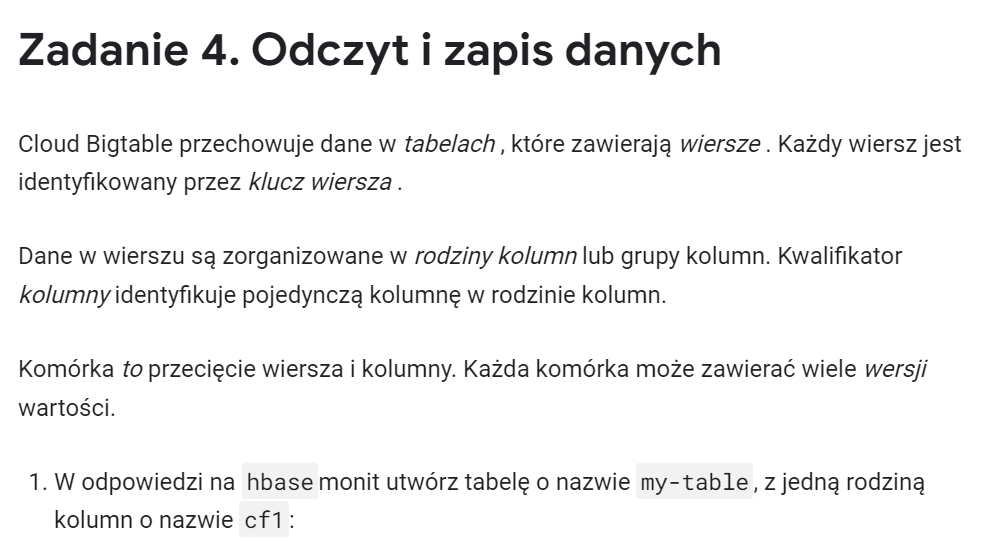

In [ ]:
create 'my-table', 'cf1'

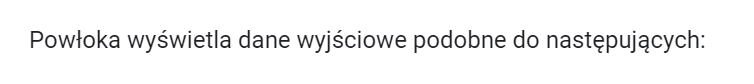

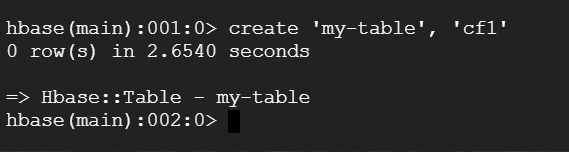

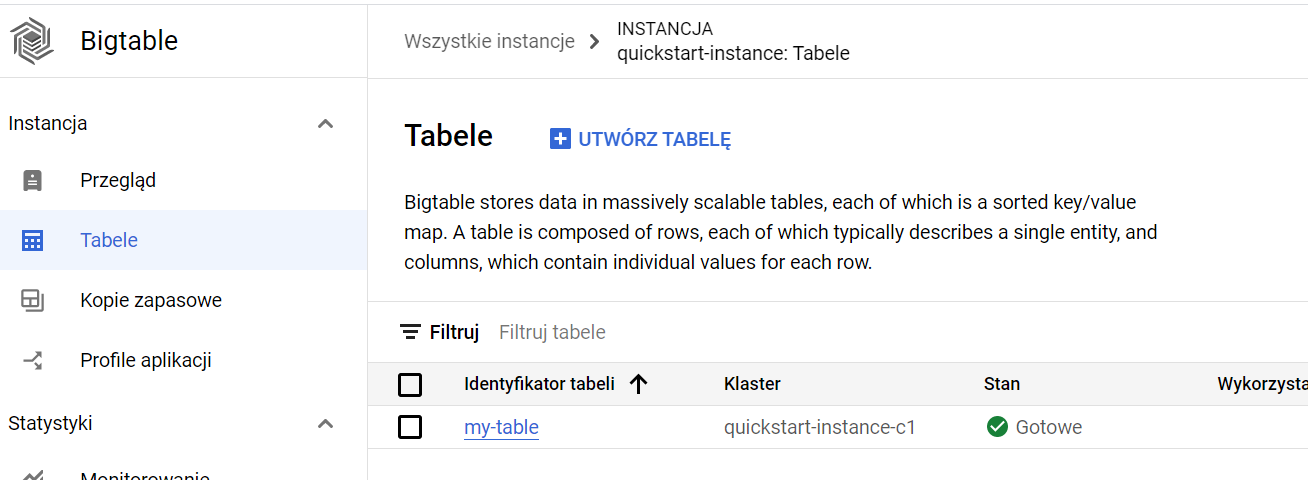

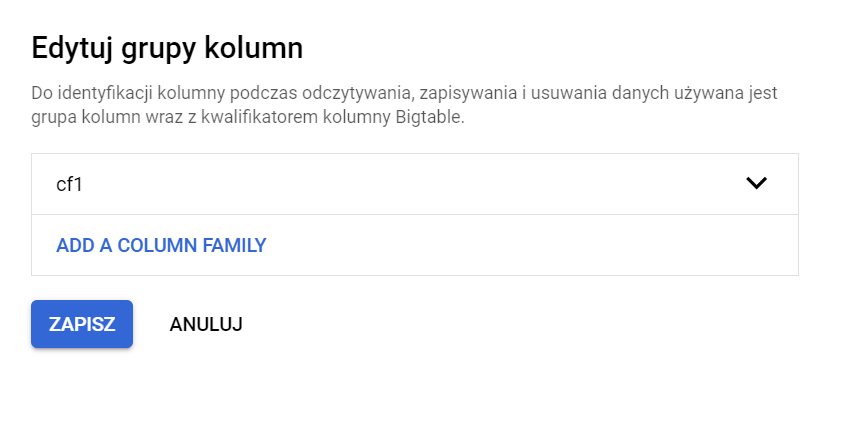

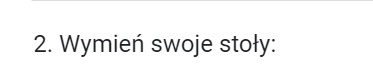

In [ ]:
list

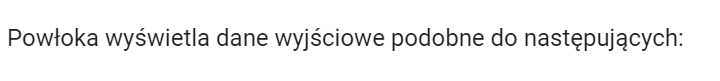

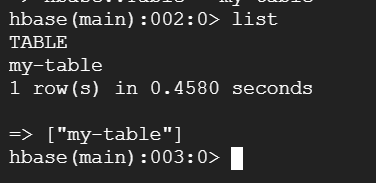

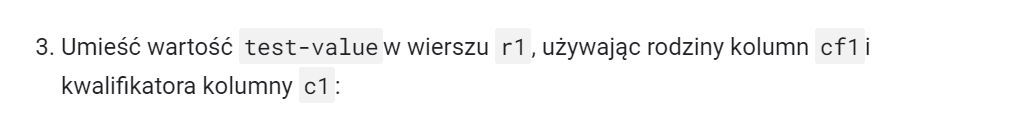

Ten kod wykonuje operację wprowadzenia (put) danych do tabeli Bigtable.

- `'my-table'` to nazwa tabeli, do której zostanie wprowadzony rekord.
- `'r1'` to nazwa wiersza, do którego zostanie wprowadzona wartość.
- `'cf1:c1'` to kwalifikator kolumny, który identyfikuje kolumnę, do której zostanie wprowadzona wartość. CF1 oznacza nazwę rodziny kolumn (column family), a c1 oznacza nazwę samej kolumny.
- `'test-value'` to wartość, która zostanie wprowadzona do tej konkretnej kolumny.

Podsumowując, ten kod wprowadza wartość "test-value" do kolumny "c1" w rodzinie kolumn "cf1" dla wiersza "r1" w tabeli "my-table".

In [ ]:
put 'my-table', 'r1', 'cf1:c1', 'test-value'

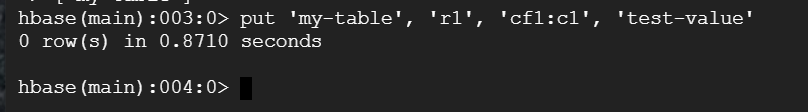

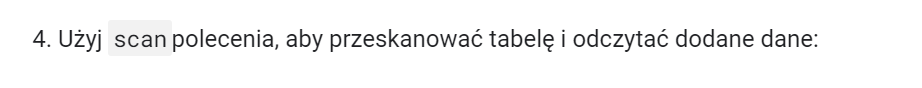

In [ ]:
scan 'my-table'

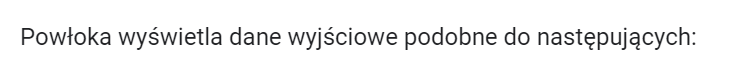

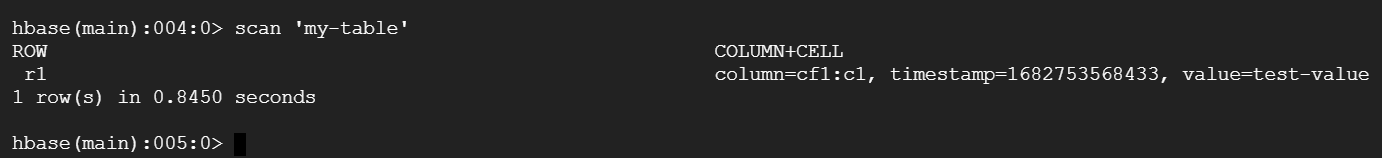

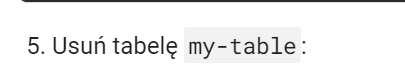

In [ ]:
disable 'my-table'

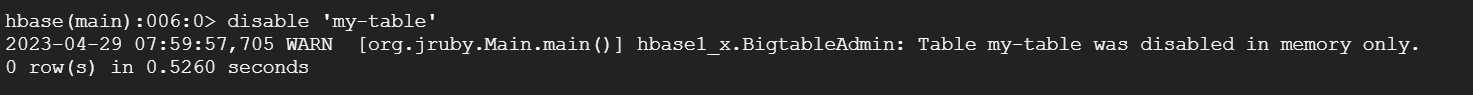

In [ ]:
drop 'my-table'

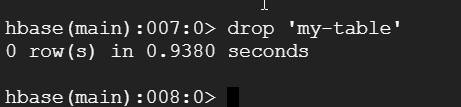

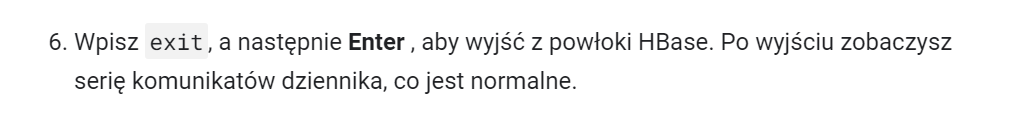

In [ ]:
exit

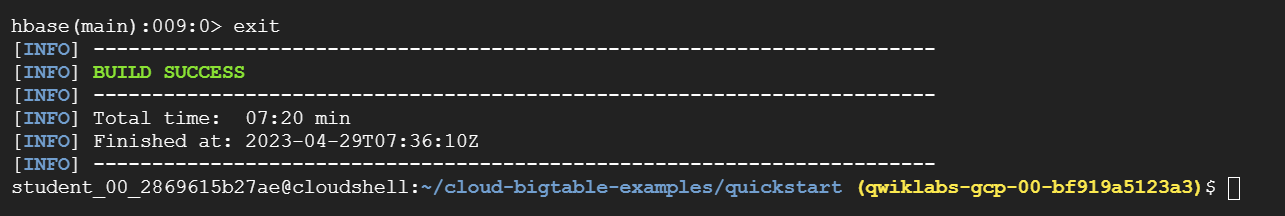